In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from datetime import date
import datetime

from pandas_datareader.data import DataReader
series_code = 'EFFR'
data_source = 'fred'
start = date(2017, 1, 1)

import yfinance as yf
import pandas as pd
import numpy as np

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller, kpss, grangercausalitytests
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler, LabelEncoder
from statsmodels.tsa.base.datetools import dates_from_str
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_white
from statsmodels.tsa.vector_ar.hypothesis_test_results import WhitenessTestResults

from sklearn.model_selection import train_test_split
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#from unit_root_test import df_test, adf_test, pp_test, kpss_test, dfgls_test

from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


# Obtención de Dataset

In [ ]:
#df_energy_m = pd.read_excel("/content/drive/MyDrive/Colab_Notebooks/MaestriaEconomia/Tesis/Datasets/Energia/DemandaResidual_PML.xlsx")
df_energy_m = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/MaestriaEconomia/Tesis/Datasets/Energia/DemandaResidual_2016_2023_monthly.xlsx')

df_energy_m['fecha'] = pd.to_datetime(df_energy_m['FECHA'])
df_energy_m.set_index(df_energy_m['fecha'])


df_energy_m['resid'] = df_energy_m['RESID_DEMAND_MW']
df_energy_m.rename(columns = {'ANIO': 'anio', 'MES': 'mes'}, inplace = True)

df_energy_m.head(10)

df_energy_m = df_energy_m.loc[(df_energy_m['FECHA'] > '2016-02-01') & (df_energy_m['FECHA'] < '2024-01-01')]


df_energy_m.head(10)

,FECHA,anio,mes,MES_STRING,CLV_CONCEPTO,PML_MDA,MONTO,FOTOVOLTAICA,TERMICA,BIOMASA,...,COMBUSTION_INTERNA,GEOTERMOELECTRICA,HIDROELECTRICA,CICLO_COMBINADO,NUCLEOELECTRICA,CARBOELECTRICA,LOAD_MW,RESID_DEMAND_MW,fecha,resid
2,2016-03-01,2016,3,3,PaEneGen_MDA,628.65,1.369306e+10,12541.980,2575186.351,671.63,...,80310.438,465597.400,2934860.218,1.225387e+07,251273.41,2498139.51,25917.16,20456.45,2016-03-01,20456.45
3,2016-04-01,2016,4,4,PaEneGen_MDA,710.64,1.631363e+10,13199.030,2947887.656,623.50,...,149581.410,476501.780,3422298.263,1.169380e+07,558805.08,2736033.69,26733.16,19619.01,2016-04-01,19619.01
4,2016-05-01,2016,5,5,PaEneGen_MDA,962.57,2.412800e+10,13989.770,3052772.053,719.57,...,163608.030,502655.250,3790387.357,1.292477e+07,909887.43,3052328.40,29547.37,22727.65,2016-05-01,22727.65
5,2016-06-01,2016,6,6,PaEneGen_MDA,1005.14,2.476586e+10,13587.353,3723857.620,75.55,...,183233.430,494608.380,3074350.130,1.318715e+07,1085577.00,3076632.25,31188.90,25498.03,2016-06-01,25498.03
6,2016-07-01,2016,7,7,PaEneGen_MDA,1094.15,2.866041e+10,14695.617,3921046.736,0.00,...,215206.631,471932.260,2883168.939,1.352230e+07,1143054.00,3089558.33,32516.11,26732.73,2016-07-01,26732.73
7,2016-08-01,2016,8,8,PaEneGen_MDA,963.52,2.531985e+10,17679.430,3758554.345,0.00,...,235605.146,493198.540,2998526.012,1.349120e+07,1126507.00,2928342.81,32099.56,26353.36,2016-08-01,26353.36
8,2016-09-01,2016,9,9,PaEneGen_MDA,1119.76,2.750395e+10,18416.717,3640625.255,86.40,...,208080.085,481617.810,2570899.131,1.335089e+07,1030333.00,2325418.46,30734.72,25610.13,2016-09-01,25610.13
9,2016-10-01,2016,10,10,PaEneGen_MDA,1026.37,2.461912e+10,18412.980,3330366.552,0.00,...,205905.528,484508.480,2099222.025,1.332713e+07,1096220.00,2189122.46,30210.11,25075.12,2016-10-01,25075.12
10,2016-11-01,2016,11,11,PaEneGen_MDA,707.52,1.509314e+10,16725.366,3021567.762,0.00,...,201524.929,483634.963,1300493.564,1.210494e+07,1096229.00,1992423.35,27290.65,23082.98,2016-11-01,23082.98
11,2016-12-01,2016,12,12,PaEneGen_MDA,814.13,1.707362e+10,19552.964,2714871.840,158.40,...,209335.212,502055.076,1106725.284,1.243317e+07,1081600.18,2255538.69,27580.31,23628.74,2016-12-01,23628.74


In [ ]:
df_energeticos = pd.read_excel('/content/drive/MyDrive/Colab_Notebooks/MaestriaEconomia/Tesis/Datasets/INP_Energeticos.xlsx')

df_energeticos.head()

,periodo,anio,mes,HH_natgas_pi,gas_natural_pi,gas_natural_price,carbon_pi,carbon_price,diesel_price,diesel_pi,combustoleo_pi
0,2015-01-01,2015,1,82.244072,82.244072,2.993684,35.424660,59.780000,1.531190,47.629147,83.549462
1,2015-02-01,2015,2,78.976287,78.976287,2.874737,36.347220,61.336842,1.827500,56.846139,80.905780
2,2015-03-01,2015,3,77.772228,77.772228,2.830909,36.431784,61.479545,1.711091,53.225122,86.968016
3,2015-04-01,2015,4,71.677132,71.677132,2.609048,35.082309,59.202273,1.768545,55.012301,83.822946
4,2015-05-01,2015,5,78.296703,78.296703,2.850000,35.122443,59.270000,1.916571,59.616791,91.389346


In [ ]:
df_rwc = pd.merge(df_energy_m, df_energeticos, how='left', on=['anio', 'mes'])

print(df_rwc.info())
df_rwc.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   FECHA               94 non-null     datetime64[ns]
 1   anio                94 non-null     int64         
 2   mes                 94 non-null     int64         
 3   MES_STRING          94 non-null     int64         
 4   CLV_CONCEPTO        94 non-null     object        
 5   PML_MDA             94 non-null     float64       
 6   MONTO               94 non-null     float64       
 7   FOTOVOLTAICA        94 non-null     float64       
 8   TERMICA             94 non-null     float64       
 9   BIOMASA             94 non-null     float64       
 10  TURBOGAS            94 non-null     float64       
 11  EOLICA              94 non-null     float64       
 12  COMBUSTION_INTERNA  94 non-null     float64       
 13  GEOTERMOELECTRICA   94 non-null     float64       
 

,FECHA,anio,mes,MES_STRING,CLV_CONCEPTO,PML_MDA,MONTO,FOTOVOLTAICA,TERMICA,BIOMASA,...,resid,periodo,HH_natgas_pi,gas_natural_pi,gas_natural_price,carbon_pi,carbon_price,diesel_price,diesel_pi,combustoleo_pi
0,2016-03-01,2016,3,3,PaEneGen_MDA,628.65,1.369306e+10,12541.980,2575186.351,671.63,...,20456.45,2016-03-01,47.479694,47.479694,1.728261,27.179395,45.865909,1.127391,35.068587,41.615198
1,2016-04-01,2016,4,4,PaEneGen_MDA,710.64,1.631363e+10,13199.030,2947887.656,623.50,...,19619.01,2016-04-01,52.708006,52.708006,1.918571,26.838403,45.290476,1.198714,37.287156,47.267208
2,2016-05-01,2016,5,5,PaEneGen_MDA,962.57,2.412800e+10,13989.770,3052772.053,719.57,...,22727.65,2016-05-01,52.809690,52.809690,1.922273,28.559718,48.195238,1.378136,42.868252,56.018706
3,2016-06-01,2016,6,6,PaEneGen_MDA,1005.14,2.476586e+10,13587.353,3723857.620,75.55,...,25498.03,2016-06-01,71.053946,71.053946,2.586364,31.960469,53.934091,1.459591,45.401974,64.633463
4,2016-07-01,2016,7,7,PaEneGen_MDA,1094.15,2.866041e+10,14695.617,3921046.736,0.00,...,26732.73,2016-07-01,77.551020,77.551020,2.822857,35.159479,59.332500,1.343238,41.782708,68.690147


In [ ]:
# Revisión de valores nulos
total = df_rwc.isnull().sum().sort_values(ascending=True)
percent = (df_rwc.isnull().sum() / df_rwc.isnull().count() * 100)
df_null = pd.concat([total, percent], keys=['total', 'percent'], axis=1).T

print(df_null)

	#Imputation
df_rwc['gas_natural_pi'] = df_rwc['gas_natural_pi'].fillna(df_rwc['gas_natural_pi'].median())
df_rwc['carbon_pi'] = df_rwc['carbon_pi'].fillna(df_rwc['carbon_pi'].median())
df_rwc['diesel_price'] = df_rwc['diesel_price'].fillna(df_rwc['diesel_price'].median())
df_rwc['combustoleo_pi'] = df_rwc['combustoleo_pi'].fillna(df_rwc['combustoleo_pi'].median())





         FECHA  diesel_price  carbon_price  carbon_pi  gas_natural_price  \
total      0.0           0.0           0.0        0.0                0.0   
percent    0.0           0.0           0.0        0.0                0.0   

         gas_natural_pi  HH_natgas_pi  periodo  resid  fecha  ...  TERMICA  \
total               0.0           0.0      0.0    0.0    0.0  ...      0.0   
percent             0.0           0.0      0.0    0.0    0.0  ...      0.0   

         FOTOVOLTAICA  MONTO  PML_MDA  CLV_CONCEPTO  MES_STRING  mes  anio  \
total             0.0    0.0      0.0           0.0         0.0  0.0   0.0   
percent           0.0    0.0      0.0           0.0         0.0  0.0   0.0   

         HIDROELECTRICA  combustoleo_pi  
total               0.0             0.0  
percent             0.0             0.0  

[2 rows x 31 columns]


# Analisis exploratorio de datos

## Corrección de outliers

In [ ]:
# Tratamiento Outliers demanda residual
truncate_resid_upper = 25000
truncate_resid_lower = 20000
mean_gas = df_rwc['resid'].mean()
print(mean_gas)

df_rwc.loc[df_rwc['resid'] > 28000, 'resid'] = pd.NA
df_rwc.fillna(truncate_resid_upper, inplace=True)

df_rwc.loc[df_rwc['resid'] < 20000, 'resid'] = pd.NA
df_rwc.fillna(truncate_resid_lower, inplace=True)

23838.6435106383


In [ ]:
# Tratamiento Outliers PMLs
truncate_pml_upper = 1500
truncate_pml_lower = 750
mean_gas = df_rwc['PML_MDA'].mean()
print(mean_gas)

df_rwc.loc[df_rwc['PML_MDA'] > 1500, 'PML_MDA'] = pd.NA
df_rwc.fillna(truncate_pml_upper, inplace=True)

df_rwc.loc[df_rwc['PML_MDA'] < 750, 'PML_MDA'] = pd.NA
df_rwc.fillna(df_rwc['PML_MDA'].median(), inplace=True)

1117.5458510638296


In [ ]:
# Tratamiento Outliers gas natural
truncate_gas_upper = 100
truncate_gas_lower = 60
mean_gas = df_rwc['HH_natgas_pi'].mean()
median_gas = df_rwc['HH_natgas_pi'].median()
print(mean_gas)

df_rwc.loc[df_rwc['HH_natgas_pi'] >= 100, 'HH_natgas_pi'] = pd.NA
df_rwc.fillna(median_gas, inplace = True)
df_rwc.loc[df_rwc['HH_natgas_pi'] < 60, 'HH_natgas_pi'] = pd.NA
df_rwc.fillna(median_gas, inplace=True)

90.39471842192971


In [ ]:
#Combustoleo
truncate_comb_upper = 110
truncate_comb_lower = 70

df_rwc.loc[df_rwc['combustoleo_pi'] > 120, 'combustoleo_pi'] = pd.NA
df_rwc.fillna(df_rwc['combustoleo_pi'].median(), inplace=True)


# df_rwc.loc[df_rwc['combustoleo_pi'] > 200, 'combustoleo_pi'] = pd.NA
# df_rwc.fillna(df_rwc['combustoleo_pi'].mean(), inplace=True)

df_rwc.loc[df_rwc['combustoleo_pi'] < 70, 'combustoleo_pi'] = pd.NA
df_rwc.fillna(df_rwc['combustoleo_pi'].median(), inplace=True)

In [ ]:
# Tratamiento outliers Carbón
truncate_coal_upper = 75
truncate_coal_lower = 40

df_rwc.loc[df_rwc['carbon_pi'] > 75, 'carbon_pi'] = pd.NA
df_rwc.fillna(df_rwc['carbon_pi'].median(), inplace=True)


In [ ]:
df_rwc['HH_natgas_d'] = df_rwc['HH_natgas_pi'].diff()
df_rwc['gas_natural_d'] = df_rwc['gas_natural_pi'].diff()
df_rwc['carbon_d'] = df_rwc['carbon_pi'].diff()
df_rwc['diesel_d'] = df_rwc['diesel_pi'].diff()
df_rwc['combustoleo_d'] = df_rwc['combustoleo_pi'].diff()


df_rwc['HH_natgas_d12'] = df_rwc['HH_natgas_pi'].diff(periods= 12)
df_rwc['gas_natural_d12'] = df_rwc['gas_natural_pi'].diff(periods= 12)
df_rwc['carbon_d12'] = df_rwc['carbon_pi'].diff(periods= 12)
df_rwc['diesel_d12'] = df_rwc['diesel_pi'].diff(periods= 12)
df_rwc['combustoleo_d12'] = df_rwc['combustoleo_pi'].diff(periods= 12)

df_rwc['gas_natural_pct'] = df_rwc['gas_natural_pi'].pct_change(periods= 12) * 100
df_rwc['carbon_pct'] = df_rwc['carbon_pi'].pct_change(periods= 12) * 100
df_rwc['diesel_pct'] = df_rwc['diesel_pi'].pct_change(periods= 12) * 100
df_rwc['combustoleo_pct'] = df_rwc['combustoleo_pi'].pct_change(periods= 12) * 100

df_rwc.head()



# Revisión de valores nulos
total = df_rwc.isnull().sum().sort_values(ascending=True)
percent = (df_rwc.isnull().sum() / df_rwc.isnull().count() * 100)
df_null = pd.concat([total, percent], keys=['total', 'percent'], axis=1).T


#Imputation
df_rwc['gas_natural_pi'] = df_rwc['gas_natural_pi'].fillna(df_rwc['gas_natural_pi'].median())
df_rwc['carbon_pi'] = df_rwc['carbon_pi'].fillna(df_rwc['carbon_pi'].median())
df_rwc['diesel_pi'] = df_rwc['diesel_pi'].fillna(df_rwc['diesel_pi'].median())
df_rwc['combustoleo_pi'] = df_rwc['combustoleo_pi'].fillna(df_rwc['combustoleo_pi'].median())


df_rwc['HH_natgas_d'] = df_rwc['HH_natgas_d'].fillna(df_rwc['HH_natgas_d'].median())
df_rwc['gas_natural_d'] = df_rwc['gas_natural_d'].fillna(df_rwc['gas_natural_d'].median())
df_rwc['carbon_d'] = df_rwc['carbon_d'].fillna(df_rwc['carbon_d'].median())
df_rwc['diesel_d'] = df_rwc['diesel_d'].fillna(df_rwc['diesel_d'].median())
df_rwc['combustoleo_d'] = df_rwc['combustoleo_d'].fillna(df_rwc['combustoleo_d'].median())

df_rwc['HH_natgas_d12'] = df_rwc['HH_natgas_d12'].fillna(df_rwc['HH_natgas_d12'].median())
df_rwc['gas_natural_d12'] = df_rwc['gas_natural_d12'].fillna(df_rwc['gas_natural_d12'].median())
df_rwc['carbon_d12'] = df_rwc['carbon_d12'].fillna(df_rwc['carbon_d12'].median())
df_rwc['diesel_d12'] = df_rwc['diesel_d12'].fillna(df_rwc['diesel_d12'].median())
df_rwc['combustoleo_d12'] = df_rwc['combustoleo_d12'].fillna(df_rwc['combustoleo_d12'].median())

df_rwc['gas_natural_pct'] = df_rwc['gas_natural_pct'].fillna(df_rwc['gas_natural_pct'].median())
df_rwc['carbon_pct'] = df_rwc['carbon_pct'].fillna(df_rwc['carbon_pct'].median())
df_rwc['diesel_pct'] = df_rwc['diesel_pct'].fillna(df_rwc['diesel_pct'].median())
df_rwc['combustoleo_pct'] = df_rwc['combustoleo_pct'].fillna(df_rwc['combustoleo_pct'].median())

# Revisión de valores nulos
total = df_rwc.isnull().sum().sort_values(ascending=True)
percent = (df_rwc.isnull().sum() / df_rwc.isnull().count() * 100)
df_null = pd.concat([total, percent], keys=['total', 'percent'], axis=1).T


df_null


,FECHA,gas_natural_pi,gas_natural_price,carbon_pi,carbon_price,diesel_price,diesel_pi,combustoleo_pi,HH_natgas_d,gas_natural_d,...,COMBUSTION_INTERNA,GEOTERMOELECTRICA,HIDROELECTRICA,CICLO_COMBINADO,NUCLEOELECTRICA,CARBOELECTRICA,LOAD_MW,RESID_DEMAND_MW,resid,combustoleo_pct
total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Analisis de cointegración


### Augmented Dickey Fuller Test

In [ ]:
def adfuller_test(series, signif=0.05, name='', verbose=False):

    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')   # Constant (default)
    r_ct = adfuller(series, regression = 'ct', autolag='AIC')
    r_n = adfuller(series, regression = 'n', autolag='AIC')


    output_constant = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value_constant = output_constant['pvalue']

    output_ct = {'test_statistic':round(r_ct[0], 4), 'pvalue':round(r_ct[1], 4), 'n_lags':round(r_ct[2], 4), 'n_obs':r_ct[3]}
    p_value_ct = output_ct['pvalue']

    output_n = {'test_statistic':round(r_n[0], 4), 'pvalue':round(r_n[1], 4), 'n_lags':round(r_n[2], 4), 'n_obs':r_n[3]}
    p_value_n = output_n['pvalue']

    def adjust(val, length= 6):
       return str(val).ljust(length)

    # Print Summary for ADF constant
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print('Regression Type: Constant (default)' )
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output_constant["test_statistic"]}')
    print(f' No. Lags Chosen       = {output_constant["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value_constant <= signif:
        print(f" => P-Value = {p_value_constant}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value_constant}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")


     # Print Summary for ADF constant and trend
    print('------------------------------------------------------------')
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print('Regression Type: Constant and Trend' )
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output_ct["test_statistic"]}')
    print(f' No. Lags Chosen       = {output_ct["n_lags"]}')

    for key,val in r_ct[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value_ct <= signif:
        print(f" => P-Value = {p_value_ct}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value_ct}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")



 # Print Summary for ADF Nothing
    print('------------------------------------------------------------')
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print('Regression Type: Nothing' )
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output_n["test_statistic"]}')
    print(f' No. Lags Chosen       = {output_n["n_lags"]}')

    for key,val in r_n[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value_n <= signif:
        print(f" => P-Value = {p_value_n}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value_n}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [ ]:
for x, y in df_rwc.items():
  print(x)


columns = ['PML_MDA', 'HH_natgas_pi', 'resid', 'carbon_pi', 'diesel_pi', 'combustoleo_pi']

FECHA
anio
mes
MES_STRING
CLV_CONCEPTO
PML_MDA
MONTO
FOTOVOLTAICA
TERMICA
BIOMASA
TURBOGAS
EOLICA
COMBUSTION_INTERNA
GEOTERMOELECTRICA
HIDROELECTRICA
CICLO_COMBINADO
NUCLEOELECTRICA
CARBOELECTRICA
LOAD_MW
RESID_DEMAND_MW
fecha
resid
periodo
HH_natgas_pi
gas_natural_pi
gas_natural_price
carbon_pi
carbon_price
diesel_price
diesel_pi
combustoleo_pi
HH_natgas_d
gas_natural_d
carbon_d
diesel_d
combustoleo_d
HH_natgas_d12
gas_natural_d12
carbon_d12
diesel_d12
combustoleo_d12
gas_natural_pct
carbon_pct
diesel_pct
combustoleo_pct


In [ ]:
# ADF Test on each


df_adf = df_rwc[columns]

for name, column in df_adf.items():

    adfuller_test(column, name=column.name)
    print('\n')



    Augmented Dickey-Fuller Test on "PML_MDA" 
    -----------------------------------------------
Regression Type: Constant (default)
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.5178
 No. Lags Chosen       = 0
 Critical value 1%     = -3.503
 Critical value 5%     = -2.893
 Critical value 10%    = -2.584
 => P-Value = 0.0002. Rejecting Null Hypothesis.
 => Series is Stationary.
------------------------------------------------------------
    Augmented Dickey-Fuller Test on "PML_MDA" 
    -----------------------------------------------
Regression Type: Constant and Trend
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.5295
 No. Lags Chosen       = 0
 Critical value 1%     = -4.06
 Critical value 5%     = -3.459
 Critical value 10%    = -3.155
 => P-Value = 0.0014. Rejecting Null Hypothesis.
 => Series is Stationary.
----------------------------------------

In [ ]:
adfuller_price = adfuller(df_rwc['PML_MDA'])
adfuller_resid = adfuller(df_rwc['resid'])
ad_fuller_nat_gas = adfuller(df_rwc['gas_natural_pi'])
ad_fuller_carbon = adfuller(df_rwc['carbon_pi'])
ad_fuller_diesel = adfuller(df_rwc['diesel_pi'])
ad_fuller_combustoleo = adfuller(df_rwc['combustoleo_pi'])


adfuller_spread_price_resid = adfuller(df_rwc['PML_MDA'] - df_rwc['resid'])
adfuller_spread_price_gas = adfuller(df_rwc['PML_MDA'] - df_rwc['gas_natural_pi'])

print('p-value (PML): %f' % adfuller_price[1])
print('p-value (resid): %f' % adfuller_resid[1])
print('p-value (nat gas index): %f' % ad_fuller_nat_gas[1])
print('p-value (carbon index): %f' % ad_fuller_carbon[1])
print('p-value (diesel index): %f' % ad_fuller_diesel[1])
print('p-value (combustoleo index): %f' % ad_fuller_combustoleo[1])

print('p-value (spread PML - resid): %f' % adfuller_spread_price_resid[1])
print('p-value (spread PML - gas): %f' % adfuller_spread_price_gas[1])




p-value (PML): 0.000183
p-value (resid): 0.000092
p-value (nat gas index): 0.000000
p-value (carbon index): 0.266117
p-value (diesel index): 0.340854
p-value (combustoleo index): 0.000126
p-value (spread PML - resid): 0.000072
p-value (spread PML - gas): 0.000165


### KPSS

In [ ]:
kpsstest = kpss(df_adf['PML_MDA'], regression="c", nlags="auto")

print(kpsstest)

(0.16909999257604816, 0.1, 5, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


<ipython-input-16-cc809ab570e2>:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(df_adf['PML_MDA'], regression="c", nlags="auto")


In [ ]:
def kpss_test(timeseries, column):

    print('--------------------------------------------')
    print("Results of KPSS Test: ", column)
    print('KPSS type Rgresion: Constant')
    kpsstest = kpss(timeseries, regression="c", nlags="auto")

    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value

    print(kpss_output)


    print("Results of KPSS Test: ", column)
    print('KPSS type Rgresion: Constant and trend')

    kpss_ct = kpss(timeseries, regression="ct", nlags="auto")

    kpss_output = pd.Series(
        kpss_ct[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpss_ct[3].items():
        kpss_output["Critical Value (%s)" % key] = value

    print(kpss_output)
    print('--------------------------------------------')


In [ ]:
for key, value in df_adf.items():
  kpss_test(df_adf[key], key)

--------------------------------------------
Results of KPSS Test:  PML_MDA
KPSS type Rgresion: Constant
Test Statistic           0.1691
p-value                  0.1000
Lags Used                5.0000
Critical Value (10%)     0.3470
Critical Value (5%)      0.4630
Critical Value (2.5%)    0.5740
Critical Value (1%)      0.7390
dtype: float64
Results of KPSS Test:  PML_MDA
KPSS type Rgresion: Constant and trend
Test Statistic           0.118262
p-value                  0.100000
Lags Used                5.000000
Critical Value (10%)     0.119000
Critical Value (5%)      0.146000
Critical Value (2.5%)    0.176000
Critical Value (1%)      0.216000
dtype: float64
--------------------------------------------
--------------------------------------------
Results of KPSS Test:  HH_natgas_pi
KPSS type Rgresion: Constant
Test Statistic           0.369248
p-value                  0.090410
Lags Used                4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical

<ipython-input-17-11afcde140fb>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression="c", nlags="auto")
<ipython-input-17-11afcde140fb>:20: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_ct = kpss(timeseries, regression="ct", nlags="auto")
<ipython-input-17-11afcde140fb>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression="c", nlags="auto")
<ipython-input-17-11afcde140fb>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest 

# Gráficas

Text(0.5, 1.0, 'índice de precios del Combustóleo')

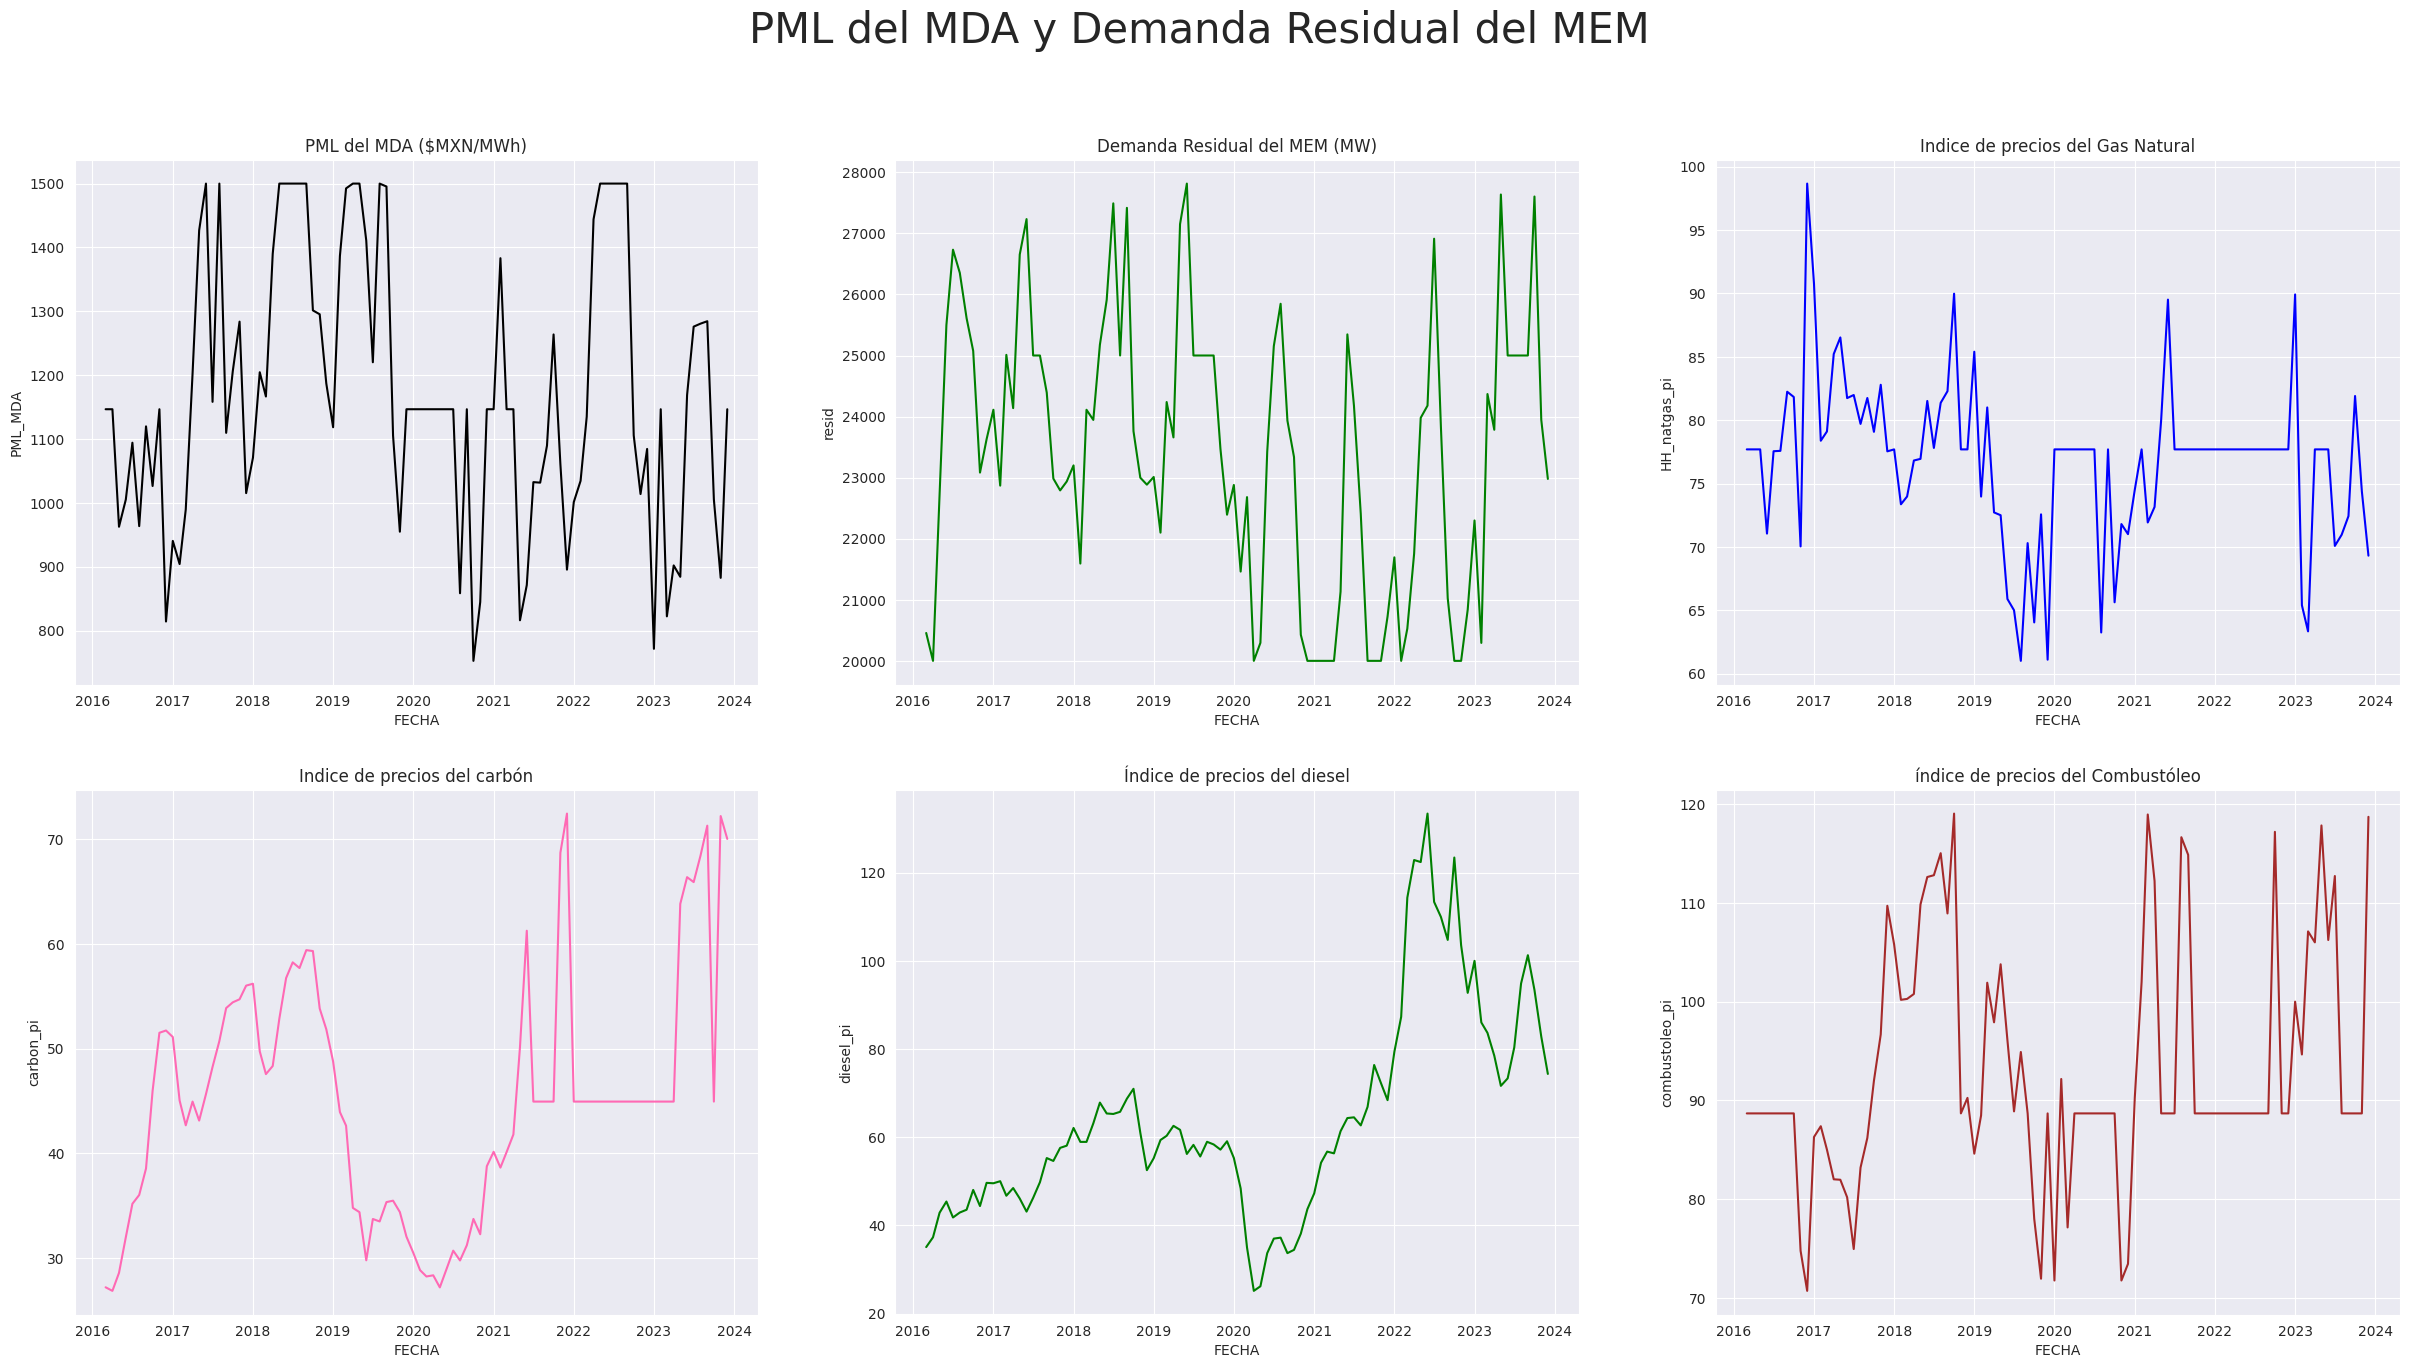

In [ ]:
sns.set_style("darkgrid")

fig, axs = plt.subplots(2,3, figsize=(30, 15))
fig.suptitle('PML del MDA y Demanda Residual del MEM', fontsize=30)



sns.lineplot(data = df_rwc, x='FECHA', y='PML_MDA', ax=axs[0,0], color='black').set_title('PML del MDA ($MXN/MWh)')
sns.lineplot(data = df_rwc, x='FECHA', y='resid', ax= axs[0,1], color = 'green').set_title('Demanda Residual del MEM (MW)')
sns.lineplot(data = df_rwc, x='FECHA', y='HH_natgas_pi', ax= axs[0,2], color = 'blue').set_title('Indice de precios del Gas Natural')
sns.lineplot(data = df_rwc, x='FECHA', y='carbon_pi', ax=axs[1,0], color='hotpink').set_title('Indice de precios del carbón')
sns.lineplot(data = df_rwc, x='FECHA', y ='diesel_pi', ax=axs[1,1], color= 'green').set_title('Índice de precios del diesel')
sns.lineplot(data = df_rwc, x='FECHA', y='combustoleo_pi', ax=axs[1,2], color = 'brown').set_title('índice de precios del Combustóleo')



Text(0.5, 1.0, 'índice de precios del Combustóleo')

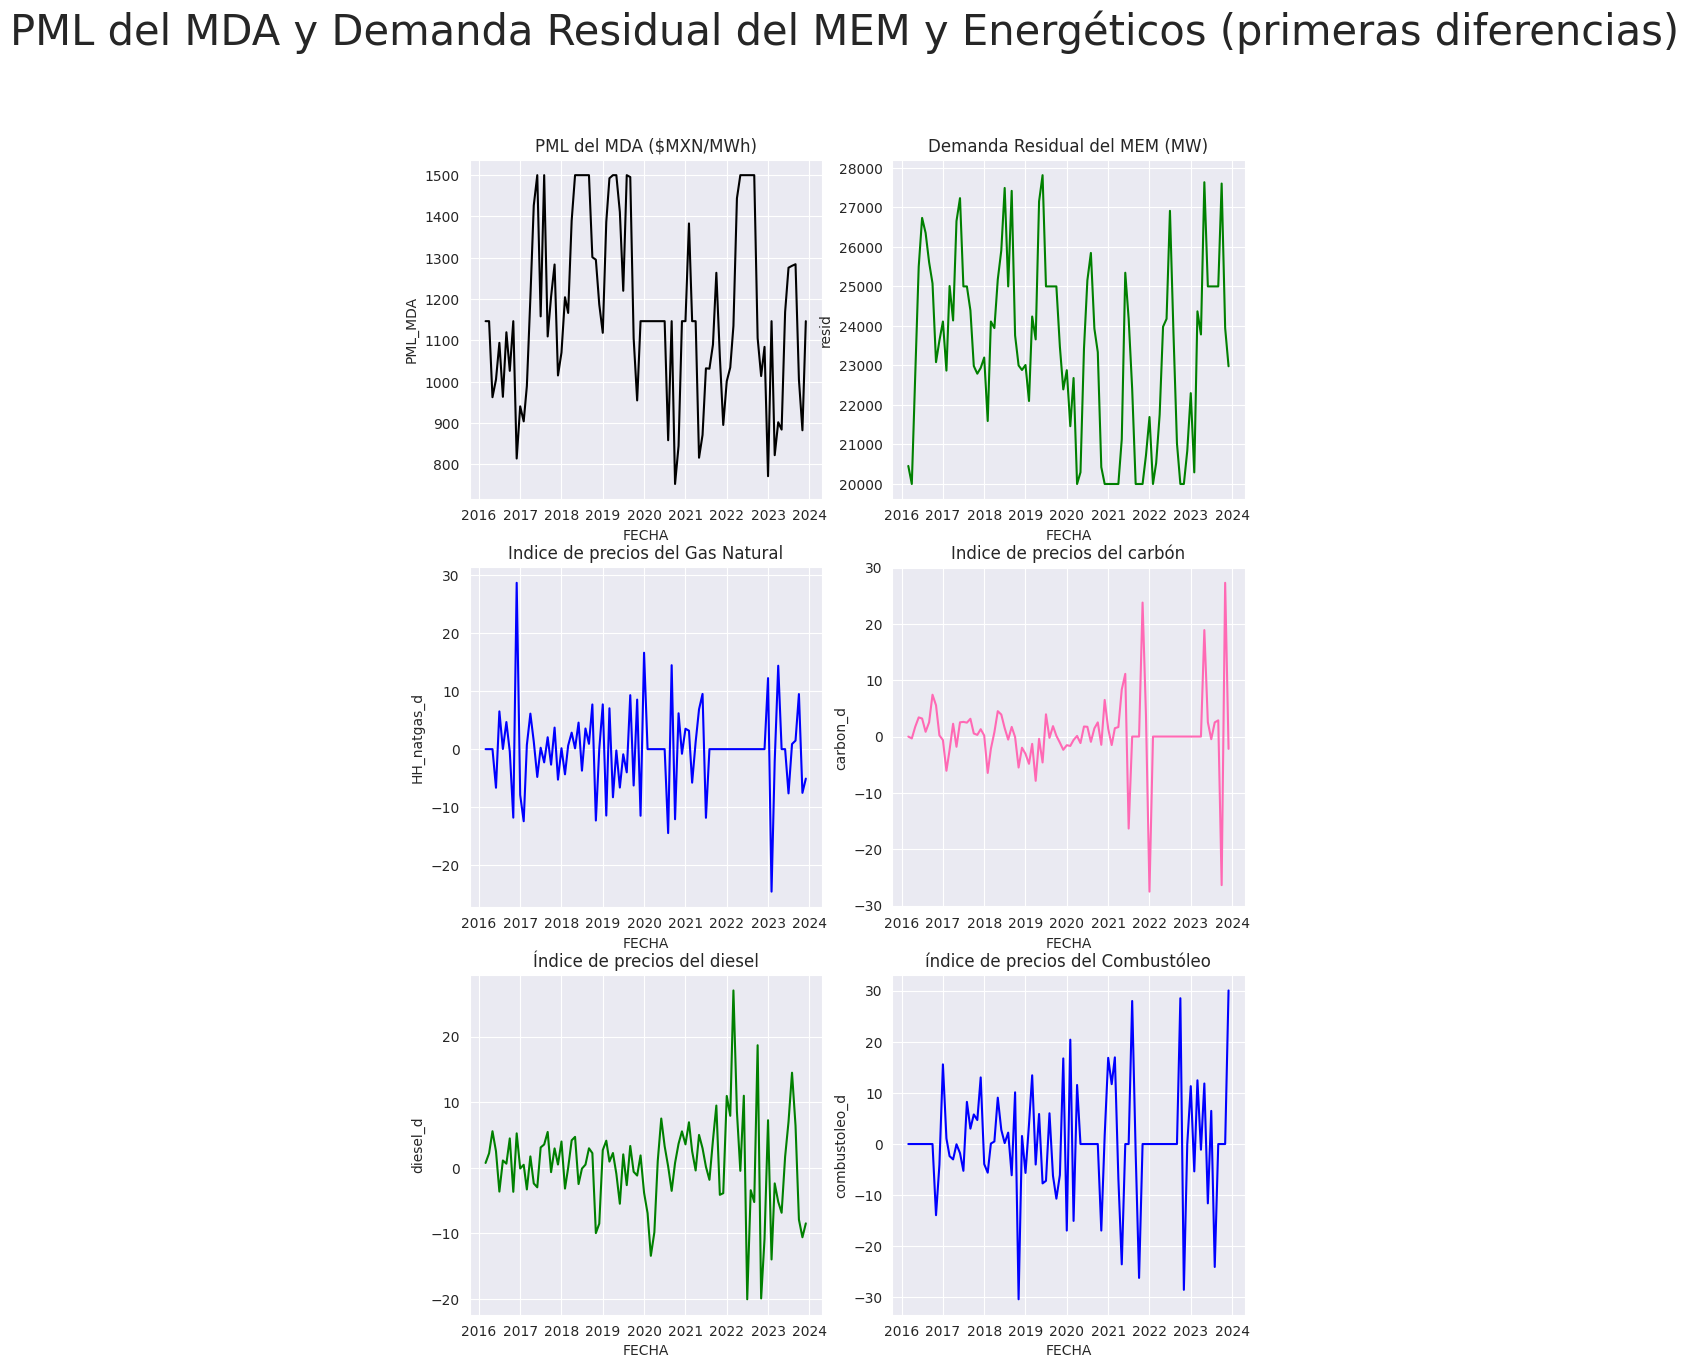

In [ ]:
fig, axs = plt.subplots(3,2, figsize=(10, 15))
fig.suptitle('PML del MDA y Demanda Residual del MEM y Energéticos (primeras diferencias)', fontsize=30)


sns.lineplot(data = df_rwc, x='FECHA', y='PML_MDA', ax=axs[0,0], color='black').set_title('PML del MDA ($MXN/MWh)')
sns.lineplot(data = df_rwc, x='FECHA', y='resid', ax= axs[0,1], color = 'green').set_title('Demanda Residual del MEM (MW)')
sns.lineplot(data = df_rwc, x='FECHA', y='HH_natgas_d', ax= axs[1,0], color = 'blue').set_title('Indice de precios del Gas Natural')
sns.lineplot(data = df_rwc, x='FECHA', y='carbon_d', ax=axs[1,1], color='hotpink').set_title('Indice de precios del carbón')
sns.lineplot(data = df_rwc, x='FECHA', y='diesel_d', ax=axs[2,0], color= 'green').set_title('Índice de precios del diesel')
sns.lineplot(data = df_rwc, x='FECHA', y='combustoleo_d', ax=axs[2,1], color = 'blue').set_title('índice de precios del Combustóleo')



Text(0, 0.5, 'PML del MDA ($MXN/MWh)')

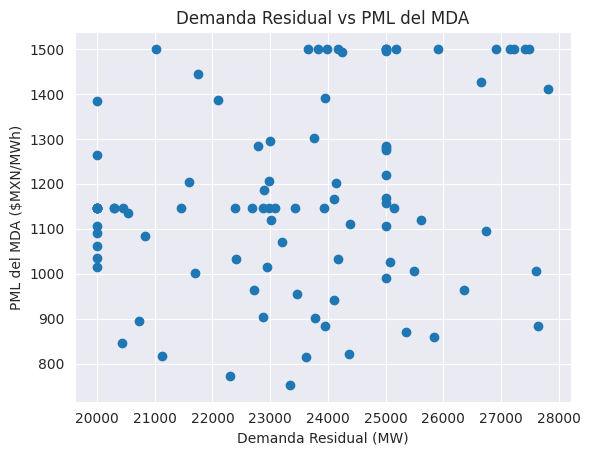

In [ ]:
plt.scatter(df_rwc['resid'], df_rwc['PML_MDA'])
plt.title('Demanda Residual vs PML del MDA')
plt.xlabel('Demanda Residual (MW)')
plt.ylabel('PML del MDA ($MXN/MWh)')


## Causalidad de Granger

In [ ]:
maxlag=12

test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table
    are the P-Values. P-Values lesser than the significance level (0.05), implies
    the Null Hypothesis that the coefficients of the corresponding past values is
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """

    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)

    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]

            if verbose:
              print(f'Y = {r}, X = {c}, P Values = {p_values}')


            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value


    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]

    return df



In [ ]:

columns_granger = ['PML_MDA', 'resid', 'gas_natural_pi', 'combustoleo_pi']


grangers_causation_matrix(df_rwc, variables = columns_granger)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print resul

,PML_MDA_x,resid_x,gas_natural_pi_x,combustoleo_pi_x
PML_MDA_y,1.0000,0.0744,0.4213,0.4877
resid_y,0.0528,1.0000,0.1144,0.1122
gas_natural_pi_y,0.0397,0.0005,1.0000,0.3819
combustoleo_pi_y,0.1503,0.0071,0.0061,1.0000


In [ ]:
grangercausalitytests(df_rwc[['combustoleo_pi', 'PML_MDA']], maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7758  , p=0.3808  , df_denom=90, df_num=1
ssr based chi2 test:   chi2=0.8017  , p=0.3706  , df=1
likelihood ratio test: chi2=0.7983  , p=0.3716  , df=1
parameter F test:         F=0.7758  , p=0.3808  , df_denom=90, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7921  , p=0.1727  , df_denom=87, df_num=2
ssr based chi2 test:   chi2=3.7902  , p=0.1503  , df=2
likelihood ratio test: chi2=3.7142  , p=0.1561  , df=2
parameter F test:         F=1.7921  , p=0.1727  , df_denom=87, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0976  , p=0.3548  , df_denom=84, df_num=3
ssr based chi2 test:   chi2=3.5671  , p=0.3122  , df=3
likelihood ratio test: chi2=3.4989  , p=0.3209  , df=3
parameter F test:         F=1.0976  , p=0.3548  , df_denom=84, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0016  , p=0.4117  , df_d

{1: ({'ssr_ftest': (0.7758274179771733, 0.38076642804728655, 90.0, 1),
   'ssr_chi2test': (0.8016883319097458, 0.3705890649676383, 1),
   'lrtest': (0.7982526633057887, 0.37161630845718063, 1),
   'params_ftest': (0.7758274179768134, 0.38076642804739524, 90.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.792096702195534, 0.17270589077074872, 87.0, 2),
   'ssr_chi2test': (3.79018153108021, 0.15030469194070345, 2),
   'lrtest': (3.714188436317613, 0.1561256389237584, 2),
   'params_ftest': (1.7920967021955485, 0.17270589077074724, 87.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.0975595567150933, 0.35482525475768656, 84.0, 3),
   'ssr_chi2test': (3.567068559324053, 0.31216716437497105, 3),
   'lrtest': (3.498931477409542, 0.32090073104674716, 3),
   'params_ftest': (1.09755955671509, 0.3548252547576891, 84.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0

In [ ]:
grangercausalitytests(df_rwc[[ 'PML_MDA', 'combustoleo_pi']], maxlag=4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4343  , p=0.5115  , df_denom=90, df_num=1
ssr based chi2 test:   chi2=0.4488  , p=0.5029  , df=1
likelihood ratio test: chi2=0.4477  , p=0.5034  , df=1
parameter F test:         F=0.4343  , p=0.5115  , df_denom=90, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2690  , p=0.7648  , df_denom=87, df_num=2
ssr based chi2 test:   chi2=0.5688  , p=0.7525  , df=2
likelihood ratio test: chi2=0.5671  , p=0.7531  , df=2
parameter F test:         F=0.2690  , p=0.7648  , df_denom=87, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3350  , p=0.8000  , df_denom=84, df_num=3
ssr based chi2 test:   chi2=1.0889  , p=0.7798  , df=3
likelihood ratio test: chi2=1.0824  , p=0.7813  , df=3
parameter F test:         F=0.3350  , p=0.8000  , df_denom=84, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7283  , p=0.5752  , df_d

{1: ({'ssr_ftest': (0.43434663830975717, 0.511546505642988, 90.0, 1),
   'ssr_chi2test': (0.44882485958674906, 0.5028935386869764, 1),
   'lrtest': (0.44774530060908546, 0.5034076244016948, 1),
   'params_ftest': (0.4343466383096736, 0.511546505643032, 90.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.2689599330253043, 0.7648069295242536, 87.0, 2),
   'ssr_chi2test': (0.5688348008811034, 0.7524525051426202, 2),
   'lrtest': (0.5670834670765998, 0.7531116914685925, 2),
   'params_ftest': (0.2689599330253213, 0.7648069295242423, 87.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.3350421257118887, 0.8000245584818533, 84.0, 3),
   'ssr_chi2test': (1.0888869085636381, 0.7797574829773206, 3),
   'lrtest': (1.0824237194362922, 0.7813186721693477, 3),
   'params_ftest': (0.33504212571186964, 0.800024558481867, 84.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0

In [ ]:
grangercausalitytests(df_rwc[[ 'PML_MDA', 'gas_natural_pi']], maxlag= 12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3001  , p=0.5852  , df_denom=90, df_num=1
ssr based chi2 test:   chi2=0.3101  , p=0.5776  , df=1
likelihood ratio test: chi2=0.3096  , p=0.5779  , df=1
parameter F test:         F=0.3001  , p=0.5852  , df_denom=90, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.1256  , p=0.8822  , df_denom=87, df_num=2
ssr based chi2 test:   chi2=0.2655  , p=0.8757  , df=2
likelihood ratio test: chi2=0.2652  , p=0.8758  , df=2
parameter F test:         F=0.1256  , p=0.8822  , df_denom=87, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.6610  , p=0.5784  , df_denom=84, df_num=3
ssr based chi2 test:   chi2=2.1481  , p=0.5422  , df=3
likelihood ratio test: chi2=2.1232  , p=0.5472  , df=3
parameter F test:         F=0.6610  , p=0.5784  , df_denom=84, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.6229  , p=0.6475  , df_d

{1: ({'ssr_ftest': (0.3001234108775071, 0.5851612299265092, 90.0, 1),
   'ssr_chi2test': (0.310127524573424, 0.5776019417179512, 1),
   'lrtest': (0.30961157943579565, 0.577918633552575, 1),
   'params_ftest': (0.3001234108775586, 0.5851612299264779, 90.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.12555216759392082, 0.882169267976068, 87.0, 2),
   'ssr_chi2test': (0.2655356188193268, 0.8756683904663964, 2),
   'lrtest': (0.26515315259030103, 0.8758358632726486, 2),
   'params_ftest': (0.12555216759396523, 0.8821692679760296, 87.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.660963585104011, 0.5783567354996707, 84.0, 3),
   'ssr_chi2test': (2.1481316515880358, 0.5422369368655899, 3),
   'lrtest': (2.1231694950281508, 0.5472396568874824, 3),
   'params_ftest': (0.6609635851047989, 0.578356735499183, 84.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0.,

In [ ]:
grangercausalitytests(df_rwc[[  'PML_MDA', 'resid']], maxlag=12)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7917  , p=0.1841  , df_denom=90, df_num=1
ssr based chi2 test:   chi2=1.8514  , p=0.1736  , df=1
likelihood ratio test: chi2=1.8332  , p=0.1758  , df=1
parameter F test:         F=1.7917  , p=0.1841  , df_denom=90, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7207  , p=0.4893  , df_denom=87, df_num=2
ssr based chi2 test:   chi2=1.5242  , p=0.4667  , df=2
likelihood ratio test: chi2=1.5117  , p=0.4696  , df=2
parameter F test:         F=0.7207  , p=0.4893  , df_denom=87, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.4721  , p=0.7025  , df_denom=84, df_num=3
ssr based chi2 test:   chi2=1.5343  , p=0.6744  , df=3
likelihood ratio test: chi2=1.5215  , p=0.6773  , df=3
parameter F test:         F=0.4721  , p=0.7025  , df_denom=84, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5742  , p=0.6821  , df_d

{1: ({'ssr_ftest': (1.7916551548420017, 0.1840961956219986, 90.0, 1),
   'ssr_chi2test': (1.8513769933367348, 0.17362332678464265, 1),
   'lrtest': (1.8331900261787268, 0.17575121974723384, 1),
   'params_ftest': (1.7916551548419863, 0.1840961956220019, 90.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.7206662098364787, 0.48930870918111746, 87.0, 2),
   'ssr_chi2test': (1.524167616205886, 0.46669291457864803, 2),
   'lrtest': (1.5116798782819387, 0.4696160001678632, 2),
   'params_ftest': (0.7206662098364728, 0.48930870918112224, 87.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (0.4720954827801715, 0.7025402794136157, 84.0, 3),
   'ssr_chi2test': (1.5343103190355574, 0.6743744645860403, 3),
   'lrtest': (1.5215192351254245, 0.6773126821826025, 3),
   'params_ftest': (0.4720954827801338, 0.7025402794136426, 84.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0.

# Regresión

In [ ]:
ly = np.log(df_rwc['PML_MDA'])

columns = ['resid', 'combustoleo_pi', 'gas_natural_pi']

lx = np.log(df_rwc[columns])

#Imputation
ly = ly.fillna(ly.median())
lx = lx.fillna(lx.median())

X_train, X_test, y_train, y_test = train_test_split(lx, ly, random_state=42, test_size=0.4)

In [ ]:
# Build - fit model
X_train = sm.add_constant(X_train)
#print(X_train)

model = sm.OLS(y_train, X_train)
results = model.fit()

print(results.params)
print(results.summary())

const             1.480816
resid             0.444467
combustoleo_pi    0.075654
gas_natural_pi    0.176640
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                PML_MDA   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.100
Method:                 Least Squares   F-statistic:                     3.039
Date:                Mon, 08 Jul 2024   Prob (F-statistic):             0.0371
Time:                        16:38:35   Log-Likelihood:                 21.411
No. Observations:                  56   AIC:                            -34.82
Df Residuals:                      52   BIC:                            -26.72
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----

# Estimación VAR

## Ejemplo VAR

In [ ]:
mdata = sm.datasets.macrodata.load_pandas().data

print(type(mdata))
print(mdata.info())

mdata



<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      203 non-null    float64
 1   quarter   203 non-null    float64
 2   realgdp   203 non-null    float64
 3   realcons  203 non-null    float64
 4   realinv   203 non-null    float64
 5   realgovt  203 non-null    float64
 6   realdpi   203 non-null    float64
 7   cpi       203 non-null    float64
 8   m1        203 non-null    float64
 9   tbilrate  203 non-null    float64
 10  unemp     203 non-null    float64
 11  pop       203 non-null    float64
 12  infl      203 non-null    float64
 13  realint   203 non-null    float64
dtypes: float64(14)
memory usage: 22.3 KB
None


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2008.0,3.0,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
199,2008.0,4.0,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
200,2009.0,1.0,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
201,2009.0,2.0,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [ ]:
dates = mdata[['year', 'quarter']].astype(int).astype(str)

quarterly = dates["year"] + "Q" + dates["quarter"]


quarterly = dates_from_str(quarterly)

mdata = mdata[['realgdp','realcons','realinv']]

mdata.index = pd.DatetimeIndex(quarterly)

data = np.log(mdata).diff().dropna()

print(type(data))


data.head()

<class 'pandas.core.frame.DataFrame'>


,realgdp,realcons,realinv
1959-06-30,0.024942,0.015286,0.080213
1959-09-30,-0.001193,0.010386,-0.072131
1959-12-31,0.003495,0.001084,0.034425
1960-03-31,0.022190,0.009534,0.102664
1960-06-30,-0.004685,0.012572,-0.106694


## Set Dummys

In [ ]:
print(df_rwc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 45 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   FECHA               94 non-null     datetime64[ns]
 1   anio                94 non-null     int64         
 2   mes                 94 non-null     int64         
 3   MES_STRING          94 non-null     int64         
 4   CLV_CONCEPTO        94 non-null     object        
 5   PML_MDA             94 non-null     float64       
 6   MONTO               94 non-null     float64       
 7   FOTOVOLTAICA        94 non-null     float64       
 8   TERMICA             94 non-null     float64       
 9   BIOMASA             94 non-null     float64       
 10  TURBOGAS            94 non-null     float64       
 11  EOLICA              94 non-null     float64       
 12  COMBUSTION_INTERNA  94 non-null     float64       
 13  GEOTERMOELECTRICA   94 non-null     float64       
 

In [ ]:
def setDummy(value):

  d1 = datetime.datetime(2017, 9, 1)
  d2 = datetime.datetime(2019, 11, 1)

  date_1 = '2017-09-01'
  date_2 = '2019-11-01'

  if value == d1 or value == d2:
    return -1
  else:
    return 0


# def setGasDummy(value):
#   if value > 115 :
#     return 1
#   else:
#     return 0


df_rwc['dummy'] = df_rwc['periodo'].apply(setDummy)




In [ ]:
df_rwc.loc[df_rwc['dummy'] == 1]

,FECHA,anio,mes,MES_STRING,CLV_CONCEPTO,PML_MDA,MONTO,FOTOVOLTAICA,TERMICA,BIOMASA,...,HH_natgas_d12,gas_natural_d12,carbon_d12,diesel_d12,combustoleo_d12,gas_natural_pct,carbon_pct,diesel_pct,combustoleo_pct,dummy


In [ ]:
model = VAR(data)
results = model.fit()
results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 08, Jul, 2024
Time:                     15:39:00
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -27.7388
Nobs:                     201.000    HQIC:                  -27.8562
Log likelihood:           1963.94    FPE:                7.37174e-13
AIC:                     -27.9360    Det(Omega_mle):     6.94859e-13
--------------------------------------------------------------------
Results for equation realgdp
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.003580         0.000911            3.928           0.000
L1.realgdp         -0.338056         0.172084           -1.964           0.049
L1.realcons         0.746283         0.130411            5.723    

## Modelo VAR

In [ ]:
df_rwc.set_index('FECHA', inplace = True)


#columns = ['PML_MDA', 'resid', 'HH_natgas_d' , 'combustoleo_pi']

columns = ['PML_MDA', 'resid', 'combustoleo_pi']


df = df_rwc[columns]



print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 94 entries, 2016-03-01 to 2023-12-01
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PML_MDA         94 non-null     float64
 1   resid           94 non-null     float64
 2   combustoleo_pi  94 non-null     float64
dtypes: float64(3)
memory usage: 2.9 KB
None


,PML_MDA,resid,combustoleo_pi
FECHA,,,
2016-03-01,1146.60,20456.45,88.677293
2016-04-01,1146.60,20000.00,88.677293
2016-05-01,962.57,22727.65,88.677293
2016-06-01,1005.14,25498.03,88.677293
2016-07-01,1094.15,26732.73,88.677293


In [ ]:
count = df.isnull().sum()
total = df.isnull().count()
percent = count/ total * 100

df_null = pd.concat([count, percent], keys=['count', 'percent'], axis=1).T

df_null

,PML_MDA,resid,combustoleo_pi
count,0.0,0.0,0.0
percent,0.0,0.0,0.0


### Order Selection

In [ ]:
model = VAR(df)


for i in range(1, 10):
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Lag Order = 1
AIC :  29.677627055005402
BIC :  30.004414086380017
FPE :  7742814478835.042
HQIC:  29.809574310349962 

Lag Order = 2
AIC :  29.802914705214896
BIC :  30.378540358671742
FPE :  8782645140187.32
HQIC:  30.0352420962516 

Lag Order = 3
AIC :  29.829249736190345
BIC :  30.657005617459635
FPE :  9033158162529.254
HQIC:  30.163197679024567 

Lag Order = 4
AIC :  29.850430368453743
BIC :  30.933681225596857
FPE :  9258233696878.607
HQIC:  30.28726078880009 

Lag Order = 5
AIC :  30.00321087689667
BIC :  31.34539678416794
FPE :  10848651674166.29
HQIC:  30.54420749904243 

Lag Order = 6
AIC :  30.12570529635032
BIC :  31.730343914819155
FPE :  12371514652722.965
HQIC:  30.77217391659625 

Lag Order = 7
AIC :  30.27371391524745
BIC :  32.144402832847476
FPE :  14531711435856.602
HQIC:  31.026982656838765 

Lag Order = 8
AIC :  30.31852521023871
BIC :  32.45894436394816
FPE :  15475947727999.926
HQIC:  31.179944756415928 

Lag Order = 9
AIC :  30.43356061983364
BIC :  32.84747480

In [ ]:
model = VAR(df)
results = model.fit(1)
results.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 08, Jul, 2024
Time:                     15:39:00
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    30.0044
Nobs:                     93.0000    HQIC:                   29.8096
Log likelihood:          -1763.89    FPE:                7.74281e+12
AIC:                      29.6776    Det(Omega_mle):     6.82390e+12
--------------------------------------------------------------------
Results for equation PML_MDA
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                   140.604390       220.932804            0.636           0.525
L1.PML_MDA                0.595878         0.085024            7.008           0.000
L1.resid                  0.010409        

# Pruebas de especificación

## Normalidad

In [ ]:
print(results.test_normality())

<statsmodels.tsa.vector_ar.hypothesis_test_results.NormalityTestResults object. H_0: data generated by normally-distributed process: fail to reject at 5% significance level. Test statistic: 11.946, critical value: 12.592>, p-value: 0.063>


In [ ]:
df.columns


Index(['PML_MDA', 'resid', 'combustoleo_pi'], dtype='object')

In [ ]:
print(type(results.resid))
df_resid = results.resid

<class 'pandas.core.frame.DataFrame'>


In [ ]:
alpha = 0.05

for i in columns:
  print(i)
  a,b = stats.jarque_bera(df_resid[[i]])

  print('Statistics:', a, 'p-value:', b)

  if b < alpha:
    print('The null hypotesis can be rejected')
  else:
    print('The null hypothesis cannot be rejected')

PML_MDA
Statistics: 2.237850692748092 p-value: 0.326630620861988
The null hypothesis cannot be rejected
resid
Statistics: 3.132389627726962 p-value: 0.20883834110198418
The null hypothesis cannot be rejected
combustoleo_pi
Statistics: 5.267403081906008 p-value: 0.07181215403838098
The null hypothesis cannot be rejected


In [ ]:
alpha = 0.05

for i in columns:
  print(i)
  a = stats.anderson(df[i], dist='norm')

  print('Statistics:', a)

  if a[0] < a[1][2]:
    print('The null hypotesis can be rejected')
  else:
    print('The null hypothesis cannot be rejected')

PML_MDA
Statistics: AndersonResult(statistic=2.0111873034253733, critical_values=array([0.554, 0.631, 0.757, 0.883, 1.05 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=1171.8624468085106, scale=211.39794144879338)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
The null hypothesis cannot be rejected
resid
Statistics: AndersonResult(statistic=1.233953369013804, critical_values=array([0.554, 0.631, 0.757, 0.883, 1.05 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=23409.622021276602, scale=2253.6970337578628)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
The null hypothesis cannot be rejected
combustoleo_pi
Statistics: AndersonResult(statistic=5.267107737341121, critical_values=array([0.554, 0.631, 0.757, 0.883, 1.05 ]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=9

In [ ]:
print(type(results.resid))

df_resid = results.resid

df_resid.loc[df_resid['resid'] < -3000]

#results.resid

<class 'pandas.core.frame.DataFrame'>


,PML_MDA,resid,combustoleo_pi
FECHA,,,
2022-09-01,132.203602,-3135.194225,-3.56307


<Axes: xlabel='FECHA'>

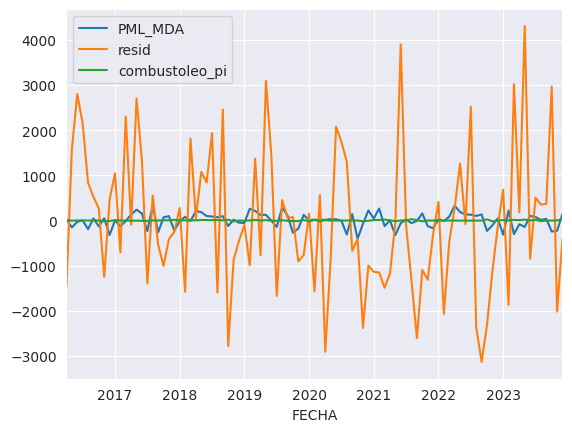

In [ ]:
results.resid.plot()

## Heteroscedasticidad

In [ ]:
print(results.test_whiteness(nlags=4, signif=0.05, adjusted=False))

<statsmodels.tsa.vector_ar.hypothesis_test_results.WhitenessTestResults object. H_0: residual autocorrelation up to lag 4 is zero: fail to reject at 5% significance level. Test statistic: 31.134, critical value: 40.113>, p-value: 0.266>


## Correlación Serial

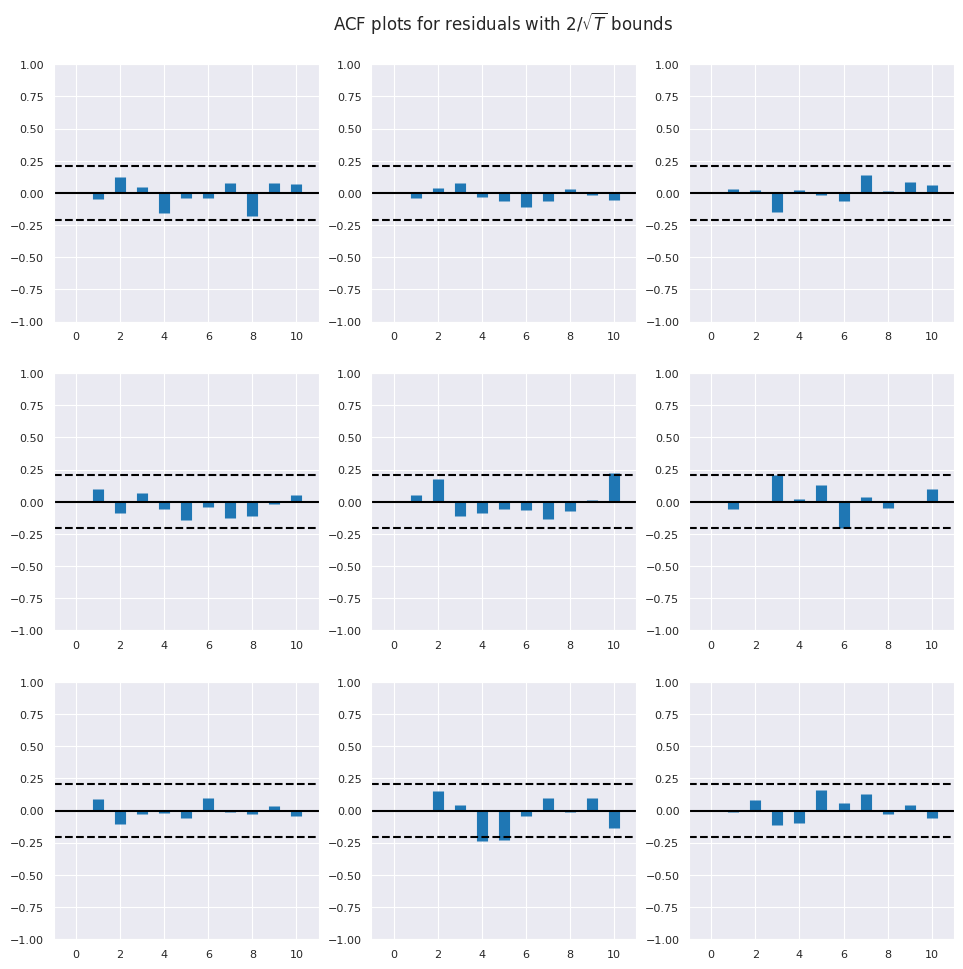

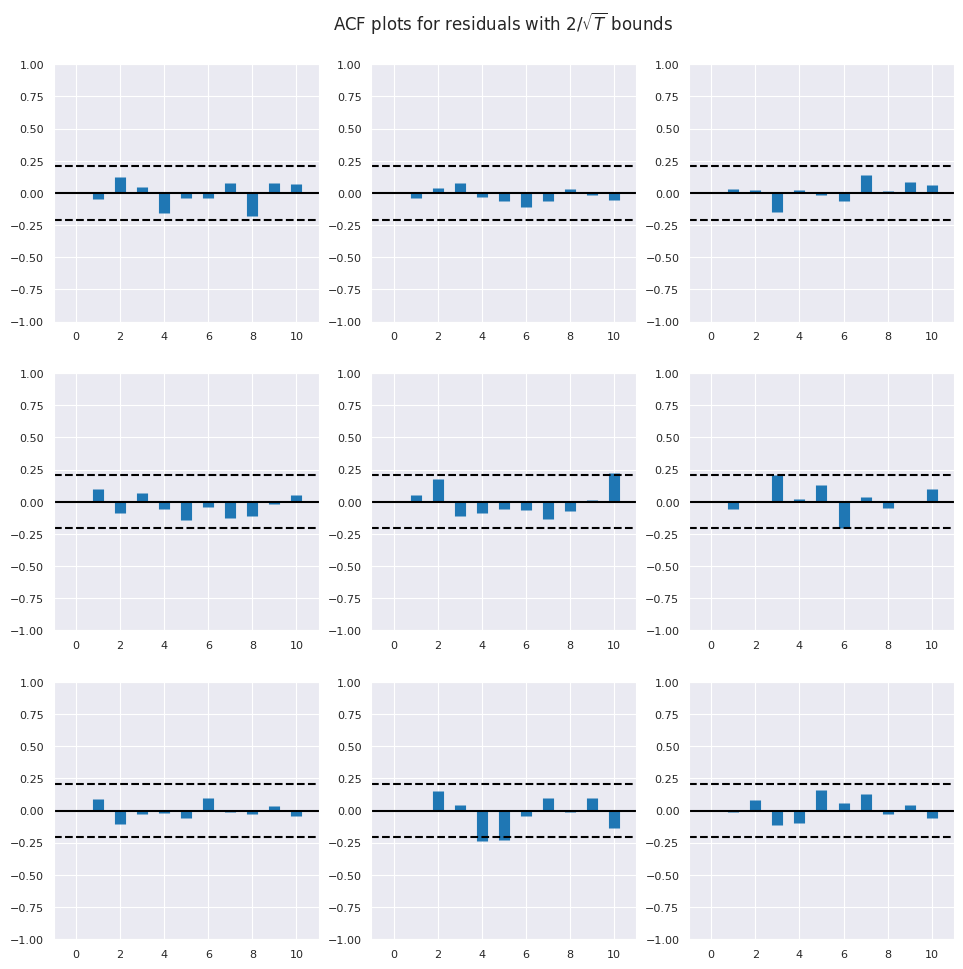

In [ ]:
results.plot_acorr()

In [ ]:
results.acorr()

array([[[1.        , 0.24931526, 0.17364681],
        [0.24931526, 1.        , 0.04326085],
        [0.17364681, 0.04326085, 1.        ]],

       [[0.63265401, 0.26007813, 0.16328833],
        [0.29652731, 0.69169623, 0.0565692 ],
        [0.17694346, 0.00912228, 0.59725544]]])

In [ ]:
out = durbin_watson(results.resid)

print(out)

for col, val in zip(df.columns, out):
    print(col, ':', round(val, 3))


[2.08588575 1.88047169 1.92357909]
PML_MDA : 2.086
resid : 1.88
combustoleo_pi : 1.924


## Estabilidad

In [ ]:
results.is_stable(verbose = True)

Eigenvalues of VAR(1) rep
0.7557290039159148
0.46991271181677186
0.6130909681618719


True

<Axes: xlabel='FECHA'>

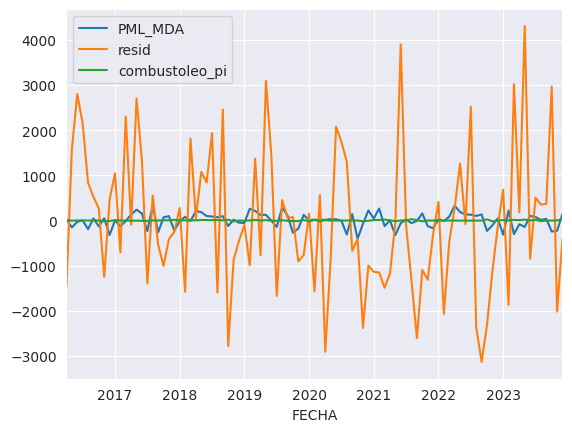

In [ ]:
results.resid.plot()
#white_test = het_white(results.resid,  results.exog)

## Proyecciones VAR

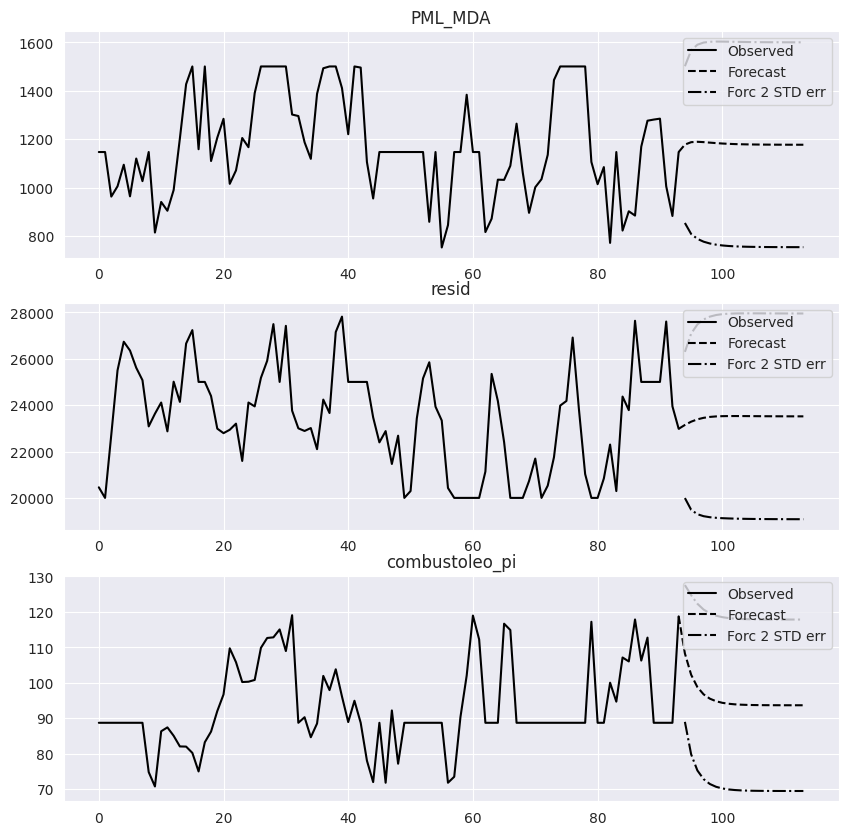

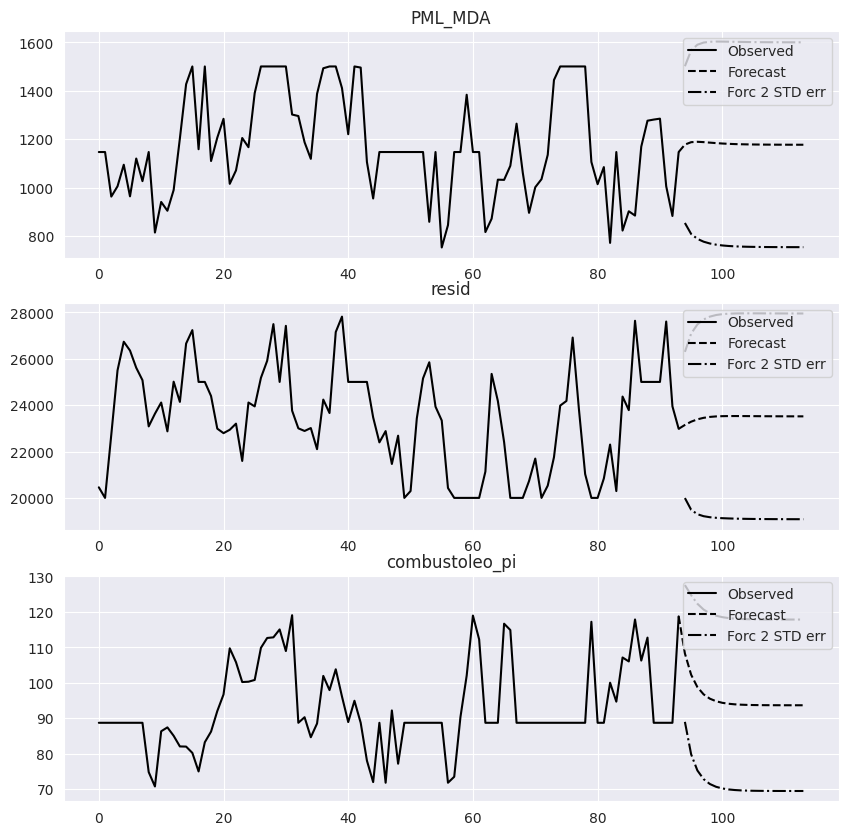

In [ ]:
results.plot_forecast(20)


## Funciones Impulso Respuesta

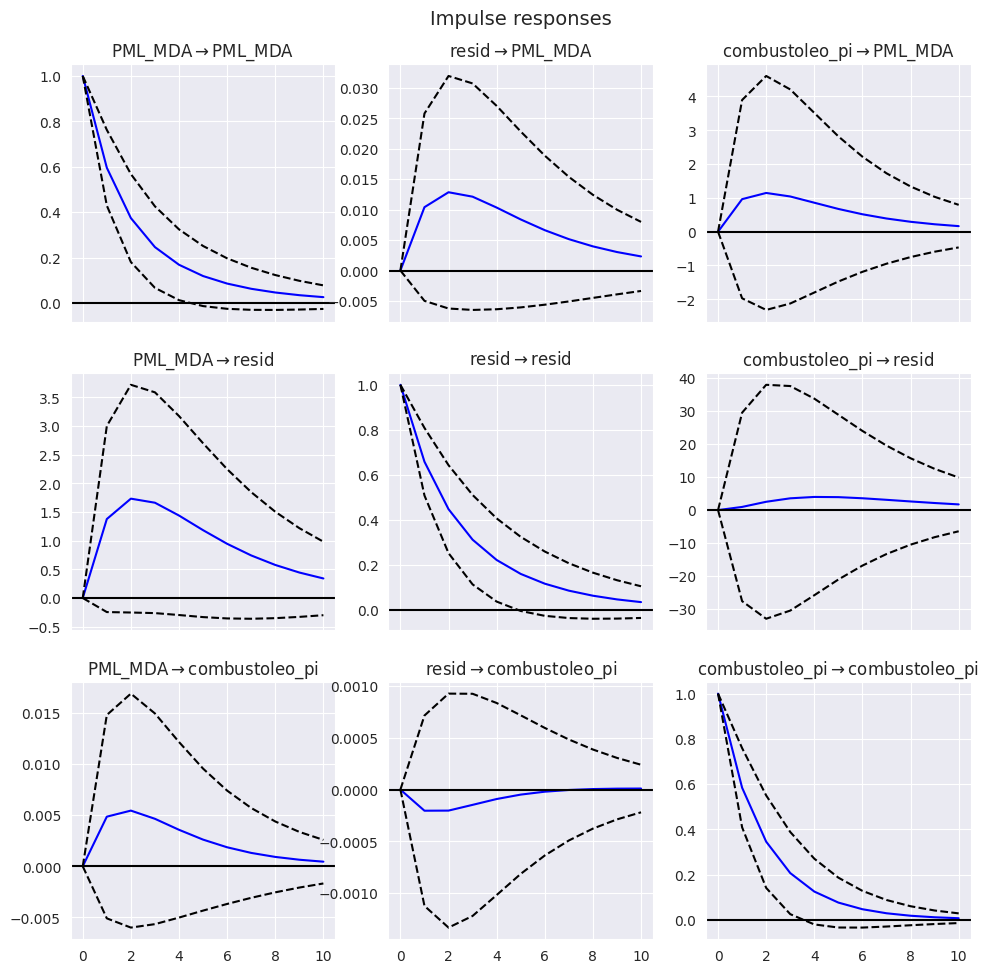

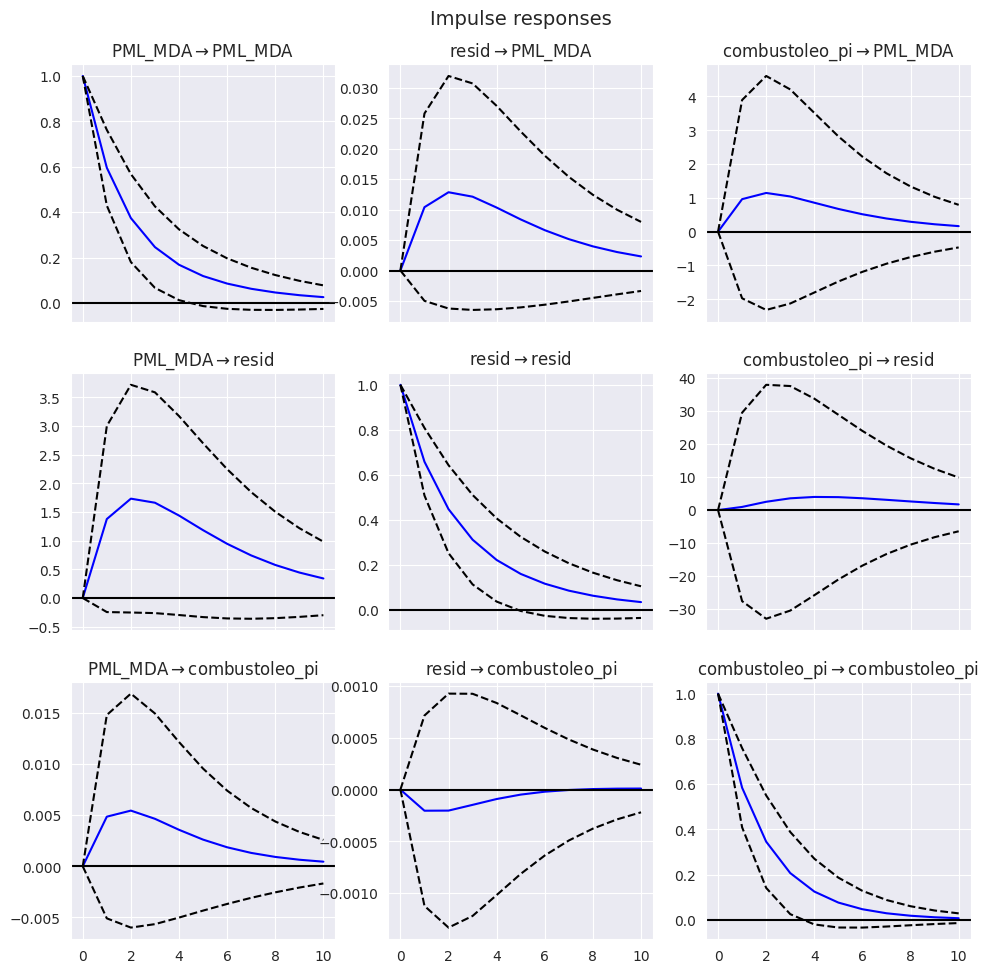

In [ ]:
irf = results.irf(10)
irf.plot(orth=False)

## Efectos acumulados

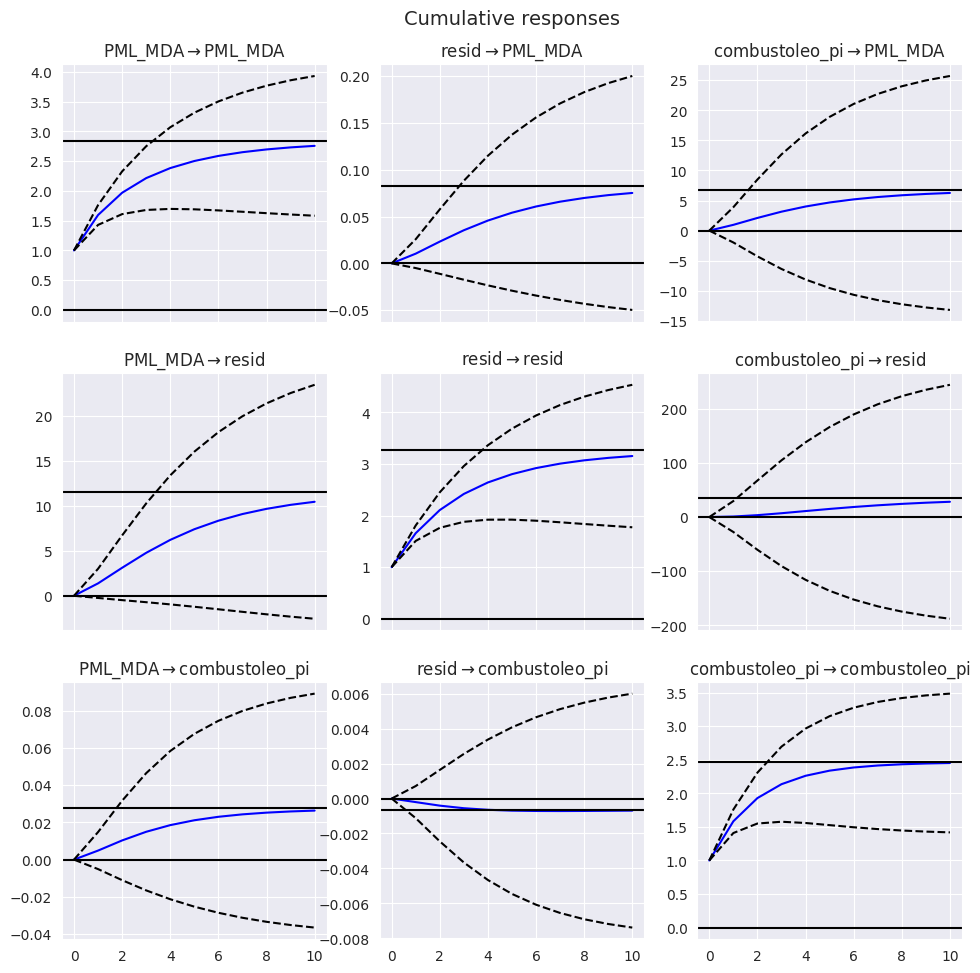

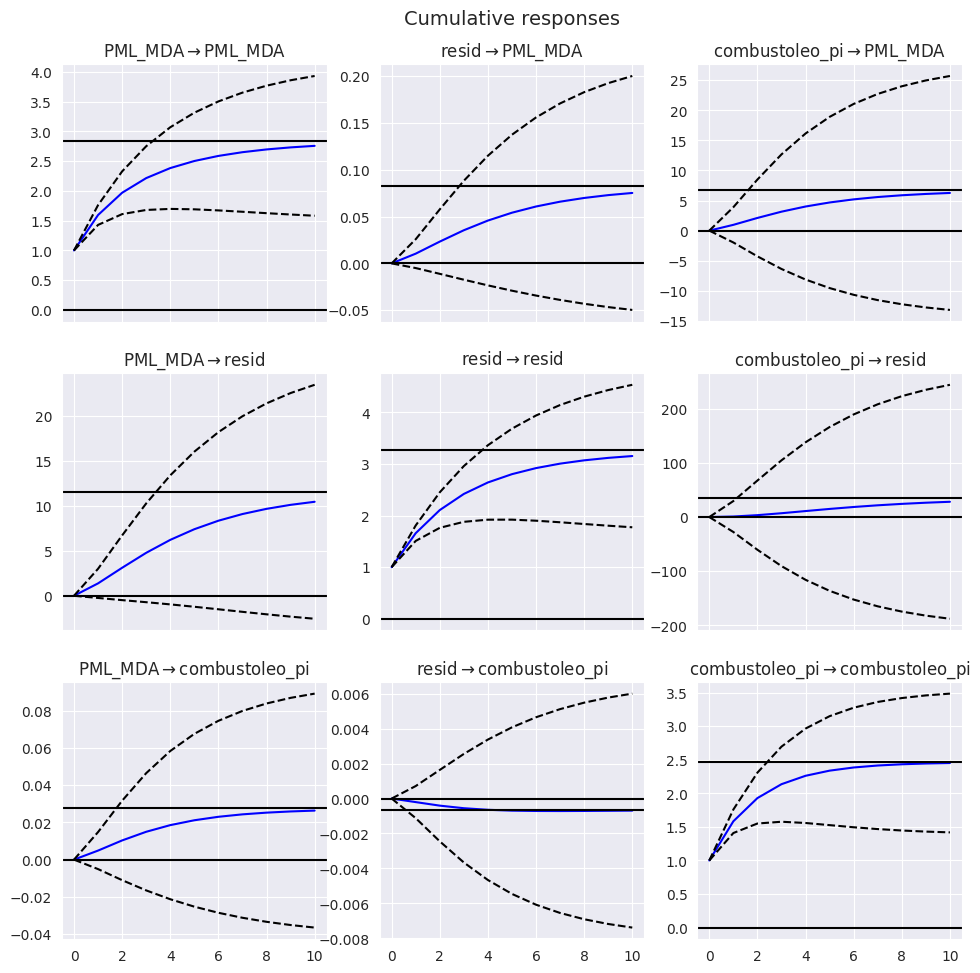

In [ ]:
irf.plot_cum_effects(orth=False)

## Descomposición de la Varianza

In [ ]:
fevd = results.fevd(5)

fevd.summary()

FEVD for PML_MDA
      PML_MDA     resid  combustoleo_pi
0    1.000000  0.000000        0.000000
1    0.989945  0.007659        0.002397
2    0.977525  0.017295        0.005180
3    0.967419  0.025270        0.007310
4    0.960421  0.030880        0.008700

FEVD for resid
      PML_MDA     resid  combustoleo_pi
0    0.000121  0.999879        0.000000
1    0.012552  0.987424        0.000024
2    0.028790  0.971048        0.000162
3    0.042452  0.957134        0.000415
4    0.052257  0.947028        0.000715

FEVD for combustoleo_pi
      PML_MDA     resid  combustoleo_pi
0    0.003158  0.000391        0.996451
1    0.012026  0.000636        0.987338
2    0.019262  0.001041        0.979696
3    0.023862  0.001265        0.974874
4    0.026437  0.001346        0.972218


